In [1]:
# 出力層の学習

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# データの読み込み
iris = datasets.load_iris()
iris_data = iris.data
sl_data = iris_data[:100, 0] # setosa & versicolor, sepal length
sw_data = iris_data[:100, 1] # setosa & versicolor, sepal width
corrects = iris.target[:100]

# 平均値を0にする
sl_ave = np.average(sl_data)
sw_ave = np.average(sw_data)
sl_data -= sl_ave
sw_data -= sw_ave

input_data = []
for sl, sw, c in zip(sl_data, sw_data, corrects):
    input_data.append([sl, sw, c])

# シグモイド関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ニューロン
class Neuron:
    def __init__(self):
        self.input_sum = 0.0
        self.output = 0.0
    
    def set_input(self, input: float):
        self.input_sum += input
    
    def get_output(self):
        self.output = sigmoid(self.input_sum)
        return self.output
    
    def reset(self):
        self.input_sum = 0
        self.output = 0

# ニューラルネットワーク
class NeuralNetwork:
    def __init__(self) -> None:
        # 入力層と中間層の重み
        self.w_im = [[4.0, 4.0], [4.0, 4.0]]
        # 中間層と出力層の重み
        self.w_mo = [[1.0, -1.0]]

        # バイアス
        self.b_m = [2.0, -2.0]
        self.b_o = [-0.5]
        
        # 各層の宣言
        self.input_layer = [0.0, 0.0]
        self.middle_layer = [Neuron(), Neuron()]
        self.output_layer = [Neuron()]
    
    def commit(self, input_data: list):
        # 各層のリセット
        self.input_layer[0] = input_data[0]
        self.input_layer[1] = input_data[1]
        self.middle_layer[0].reset()
        self.middle_layer[1].reset()
        self.output_layer[0].reset()
        
        # 入力層→中間層
        self.middle_layer[0].set_input(self.input_layer[0] * self.w_im[0][0])
        self.middle_layer[0].set_input(self.input_layer[1] * self.w_im[0][1])
        self.middle_layer[0].set_input(self.b_m[0])
        self.middle_layer[1].set_input(self.input_layer[0] * self.w_im[1][0])
        self.middle_layer[1].set_input(self.input_layer[1] * self.w_im[1][1])
        self.middle_layer[1].set_input(self.b_m[1])
        
        # 中間層→出力層
        self.output_layer[0].set_input(self.middle_layer[0].get_output() * self.w_mo[0][0])
        self.output_layer[0].set_input(self.middle_layer[1].get_output() * self.w_mo[0][1])
        self.output_layer[0].set_input(self.b_o[0])
        
        return self.output_layer[0].get_output()

    def train(self, correct: float):
        # 学習係数
        k = 0.3
        
        # 出力
        output_o = self.output_layer[0].output
        output_m0 = self.middle_layer[0].output
        output_m1 = self.middle_layer[1].output
        
        # δ 修正量ベース
        delta_o = (output_o - correct) * output_o * (1.0 - output_o)
        
        # パラメータ更新
        self.w_mo[0][0] -= k * delta_o * (1.0 - output_m0)
        self.w_mo[0][1] -= k * delta_o * (1.0 - output_m1)
        self.b_o[0] -= k * delta_o

neural_network = NeuralNetwork()

print("初期値")
print("w_im", neural_network.w_im)
print("w_mo", neural_network.w_mo)
print("b_m", neural_network.b_m)
print("b_o", neural_network.b_o)
neural_network.commit(input_data[0][:2])
neural_network.train(input_data[0][2])
print("更新後")
print("w_im", neural_network.w_im)
print("w_mo", neural_network.w_mo)
print("b_m", neural_network.b_m)
print("b_o", neural_network.b_o)

初期値
w_im [[4.0, 4.0], [4.0, 4.0]]
w_mo [[1.0, -1.0]]
b_m [2.0, -2.0]
b_o [-0.5]
更新後
w_im [[4.0, 4.0], [4.0, 4.0]]
w_mo [[0.9955369132020476, -1.0361322523273173]]
b_m [2.0, -2.0]
b_o [-0.541645676531177]


In [3]:
# 中間層の学習

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# データの読み込み
iris = datasets.load_iris()
iris_data = iris.data
sl_data = iris_data[:100, 0] # setosa & versicolor, sepal length
sw_data = iris_data[:100, 1] # setosa & versicolor, sepal width
corrects = iris.target[:100]

# 平均値を0にする
sl_ave = np.average(sl_data)
sw_ave = np.average(sw_data)
sl_data -= sl_ave
sw_data -= sw_ave

input_data = []
for sl, sw, c in zip(sl_data, sw_data, corrects):
    input_data.append([sl, sw, c])

# シグモイド関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ニューロン
class Neuron:
    def __init__(self):
        self.input_sum = 0.0
        self.output = 0.0
    
    def set_input(self, input: float):
        self.input_sum += input
    
    def get_output(self):
        self.output = sigmoid(self.input_sum)
        return self.output
    
    def reset(self):
        self.input_sum = 0
        self.output = 0

# ニューラルネットワーク
class NeuralNetwork:
    def __init__(self) -> None:
        # 入力層と中間層の重み
        self.w_im = [[4.0, 4.0], [4.0, 4.0]]
        # 中間層と出力層の重み
        self.w_mo = [[1.0, -1.0]]

        # バイアス
        self.b_m = [2.0, -2.0]
        self.b_o = [-0.5]
        
        # 各層の宣言
        self.input_layer = [0.0, 0.0]
        self.middle_layer = [Neuron(), Neuron()]
        self.output_layer = [Neuron()]
    
    def commit(self, input_data: list):
        # 各層のリセット
        self.input_layer[0] = input_data[0]
        self.input_layer[1] = input_data[1]
        self.middle_layer[0].reset()
        self.middle_layer[1].reset()
        self.output_layer[0].reset()
        
        # 入力層→中間層
        self.middle_layer[0].set_input(self.input_layer[0] * self.w_im[0][0])
        self.middle_layer[0].set_input(self.input_layer[1] * self.w_im[0][1])
        self.middle_layer[0].set_input(self.b_m[0])
        self.middle_layer[1].set_input(self.input_layer[0] * self.w_im[1][0])
        self.middle_layer[1].set_input(self.input_layer[1] * self.w_im[1][1])
        self.middle_layer[1].set_input(self.b_m[1])
        
        # 中間層→出力層
        self.output_layer[0].set_input(self.middle_layer[0].get_output() * self.w_mo[0][0])
        self.output_layer[0].set_input(self.middle_layer[1].get_output() * self.w_mo[0][1])
        self.output_layer[0].set_input(self.b_o[0])
        
        return self.output_layer[0].get_output()
    
    def train(self, correct: float):
        # 学習係数
        k = 0.3
        
        # 出力
        output_o = self.output_layer[0].output
        output_m0 = self.middle_layer[0].output
        output_m1 = self.middle_layer[1].output
        
        # δ 修正量ベース
        delta_o = (output_o - correct) * output_o * (1.0 - output_o)
        delta_m0 = delta_o * self.w_mo[0][0] * (1.0 - output_m0)
        delta_m1 = delta_o * self.w_mo[0][1] * (1.0 - output_m1)
        
        # パラメータ更新
        self.w_mo[0][0] -= k * delta_o * output_m0
        self.w_mo[0][1] -= k * delta_o * output_m1
        self.b_o[0] -= k * delta_o
        
        self.w_im[0][0] -= k * delta_m0 * self.input_layer[0]
        self.w_im[0][1] -= k * delta_m0 * self.input_layer[1]
        self.w_im[1][0] -= k * delta_m1 * self.input_layer[0]
        self.w_im[1][1] -= k * delta_m1 * self.input_layer[1]
        self.b_m[0] -= k * delta_m0
        self.b_m[1] -= k * delta_m1

neural_network = NeuralNetwork()

print("初期値")
print("w_im", neural_network.w_im)
print("w_mo", neural_network.w_mo)
print("b_m", neural_network.b_m)
print("b_o", neural_network.b_o)
neural_network.commit(input_data[0][:2])
neural_network.train(input_data[0][2])
print("更新後")
print("w_im", neural_network.w_im)
print("w_mo", neural_network.w_mo)
print("b_m", neural_network.b_m)
print("b_o", neural_network.b_o)


初期値
w_im [[4.0, 4.0], [4.0, 4.0]]
w_mo [[1.0, -1.0]]
b_m [2.0, -2.0]
b_o [-0.5]
更新後
w_im [[4.001655805202041, 3.998210302194021], [3.986594934386565, 4.014489033183255]]
w_mo [[0.9628174102667754, -1.0055134242038597]]
b_m [1.9955369132020477, -1.9638677476726827]
b_o [-0.541645676531177]


epoch: 0


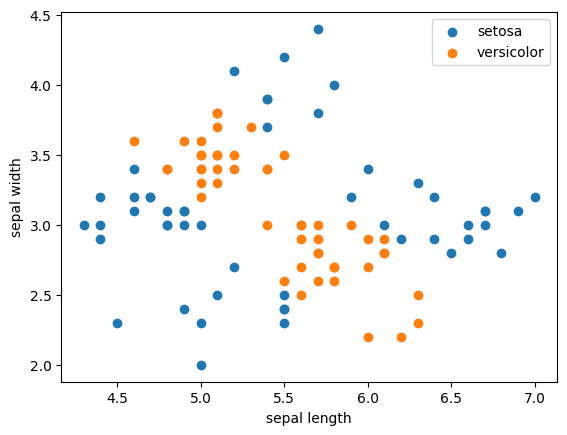

epoch: 1


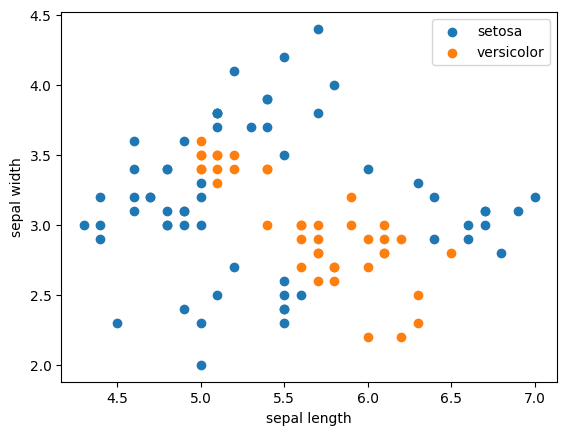

epoch: 2


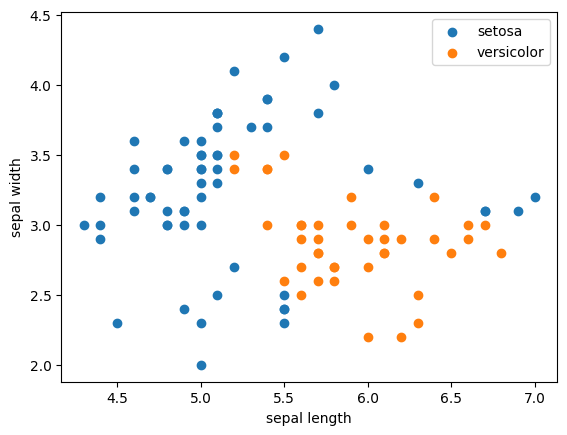

epoch: 4


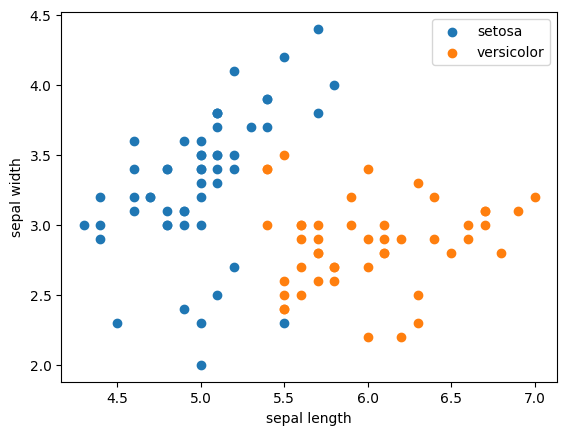

epoch: 8


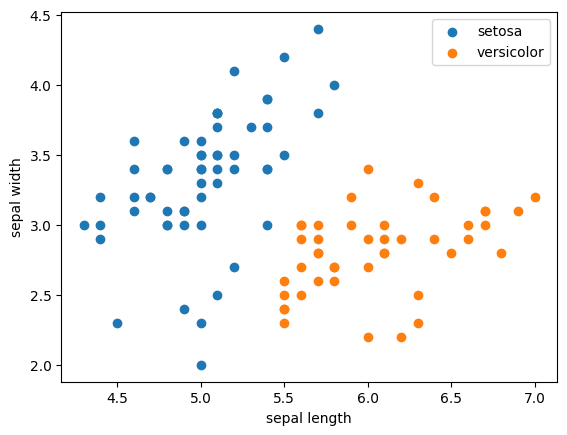

epoch: 16


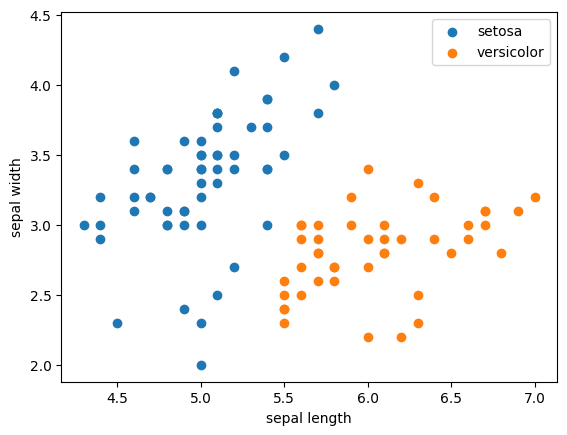

epoch: 32


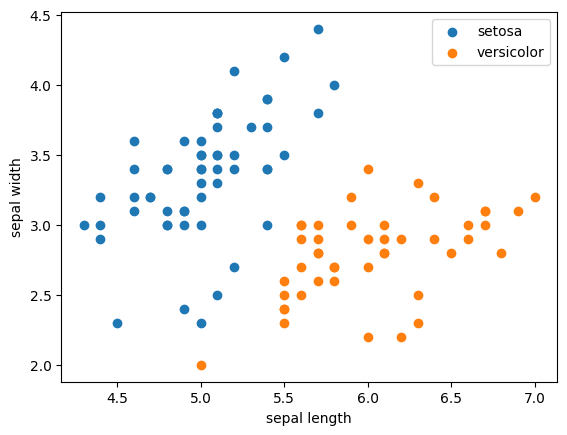

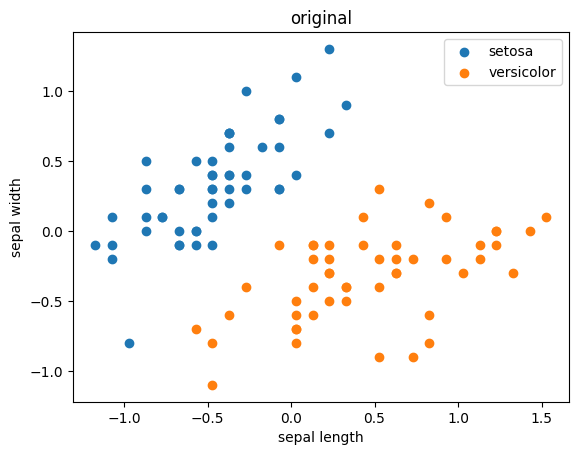

In [5]:
# ニューラルネットワークの訓練

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import random

# データの読み込み
iris = datasets.load_iris()
iris_data = iris.data
sl_data = iris_data[:100, 0] # setosa & versicolor, sepal length
sw_data = iris_data[:100, 1] # setosa & versicolor, sepal width
corrects = iris.target[:100]

# 平均値を0にする
sl_ave = np.average(sl_data)
sw_ave = np.average(sw_data)
sl_data -= sl_ave
sw_data -= sw_ave

input_data = []
for sl, sw, c in zip(sl_data, sw_data, corrects):
    input_data.append([sl, sw, c])

# シグモイド関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ニューロン
class Neuron:
    def __init__(self):
        self.input_sum = 0.0
        self.output = 0.0
    
    def set_input(self, input: float):
        self.input_sum += input
    
    def get_output(self):
        self.output = sigmoid(self.input_sum)
        return self.output
    
    def reset(self):
        self.input_sum = 0
        self.output = 0

# ニューラルネットワーク
class NeuralNetwork:
    def __init__(self) -> None:
        # 入力層と中間層の重み
        self.w_im = [[4.0, 4.0], [4.0, 4.0]]
        # 中間層と出力層の重み
        self.w_mo = [[1.0, -1.0]]

        # バイアス
        self.b_m = [2.0, -2.0]
        self.b_o = [-0.5]
        
        # 各層の宣言
        self.input_layer = [0.0, 0.0]
        self.middle_layer = [Neuron(), Neuron()]
        self.output_layer = [Neuron()]
    
    def commit(self, input_data: list):
        # 各層のリセット
        self.input_layer[0] = input_data[0]
        self.input_layer[1] = input_data[1]
        self.middle_layer[0].reset()
        self.middle_layer[1].reset()
        self.output_layer[0].reset()
        
        # 入力層→中間層
        self.middle_layer[0].set_input(self.input_layer[0] * self.w_im[0][0])
        self.middle_layer[0].set_input(self.input_layer[1] * self.w_im[0][1])
        self.middle_layer[0].set_input(self.b_m[0])
        self.middle_layer[1].set_input(self.input_layer[0] * self.w_im[1][0])
        self.middle_layer[1].set_input(self.input_layer[1] * self.w_im[1][1])
        self.middle_layer[1].set_input(self.b_m[1])
        
        # 中間層→出力層
        self.output_layer[0].set_input(self.middle_layer[0].get_output() * self.w_mo[0][0])
        self.output_layer[0].set_input(self.middle_layer[1].get_output() * self.w_mo[0][1])
        self.output_layer[0].set_input(self.b_o[0])
        
        return self.output_layer[0].get_output()
    
    def train(self, correct: float):
        # 学習係数
        k = 0.3
        
        # 出力
        output_o = self.output_layer[0].output
        output_m0 = self.middle_layer[0].output
        output_m1 = self.middle_layer[1].output
        
        # δ 修正量ベース
        delta_o = (output_o - correct) * output_o * (1.0 - output_o)
        delta_m0 = delta_o * self.w_mo[0][0] * (1.0 - output_m0)
        delta_m1 = delta_o * self.w_mo[0][1] * (1.0 - output_m1)
        
        # パラメータ更新
        self.w_mo[0][0] -= k * delta_o * output_m0
        self.w_mo[0][1] -= k * delta_o * output_m1
        self.b_o[0] -= k * delta_o
        
        self.w_im[0][0] -= k * delta_m0 * self.input_layer[0]
        self.w_im[0][1] -= k * delta_m0 * self.input_layer[1]
        self.w_im[1][0] -= k * delta_m1 * self.input_layer[0]
        self.w_im[1][1] -= k * delta_m1 * self.input_layer[1]
        self.b_m[0] -= k * delta_m0
        self.b_m[1] -= k * delta_m1

neural_network = NeuralNetwork()

# グラフ表示関数
def show_graph(epoch):
    print("epoch:", epoch)
    # 実行
    st_predicted = [[], []]
    vc_predicted = [[], []]
    for data in input_data:
        if neural_network.commit(data[:2]) < 0.5:
            st_predicted[0].append(data[0]+sl_ave)
            st_predicted[1].append(data[1]+sw_ave)
        else:
            vc_predicted[0].append(data[0]+sl_ave)
            vc_predicted[1].append(data[1]+sw_ave)
    
    # グラフ表示
    plt.scatter(st_predicted[0], st_predicted[1], label="setosa")
    plt.scatter(vc_predicted[0], vc_predicted[1], label="versicolor")
    plt.legend()
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.show()

# 訓練前のグラフ表示
show_graph(0)

# 学習とグラフ表示
for t in range(0, 32):
    random.shuffle(input_data)
    for data in input_data:
        neural_network.commit(data[:2]) # 順伝播
        neural_network.train(data[2]) # 逆伝播
    if t+1 in [1, 2, 4, 8, 16, 32]:
        show_graph(t+1)

# 元のデータの表示
st_data = iris_data[:50]
vc_data = iris_data[50:100]
plt.scatter(st_data[:, 0], st_data[:, 1], label="setosa")
plt.scatter(vc_data[:, 0], vc_data[:, 1], label="versicolor")
plt.legend()
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("original")
plt.show()

